In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("books.csv")

In [20]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11/01/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic


In [24]:
# df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y',errors='coerce')

In [29]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759178e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428650e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780000e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780000e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780000e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790000e+12,6576.000000,4.597666e+06,94265.000000


In [30]:
df.describe(include=['O'])

,title,authors,isbn,language_code,publication_date,publisher
count,11127,11127,11127,11127,11127,11127
unique,10352,6643,11127,27,3679,2292
top,The Brothers Karamazov,Stephen King,439785960,eng,10/01/2005,Vintage
freq,9,40,1,8911,56,318


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  float64
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [3]:
# Quick EDA tool

import dtale
d = dtale.show(df)
d.open_browser()

In [3]:
'''
import sweetviz
my_report  = sweetviz.analyze(df, target_feat='average_rating')
my_report.show_html('FinalReport.html')
'''

                                             |                                             | [  0%]   00:00 ->…

C:\ProgramData\Anaconda3\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\ProgramData\Anaconda3\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\ProgramData\Anaconda3\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\ProgramData\Anaconda3\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


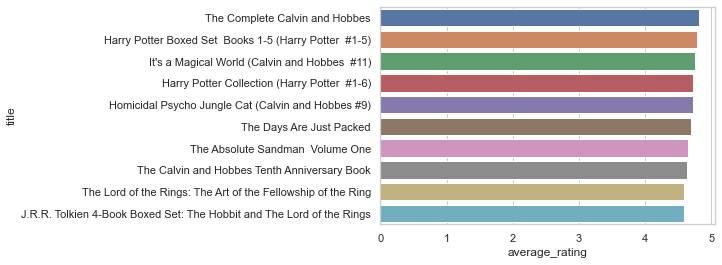

In [26]:
# What are the top 10 highest rating books? (filter only rating count > 10,000)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="average_rating", y="title", data=df[df['ratings_count']>=10000].sort_values('average_rating', ascending=False).head(10))

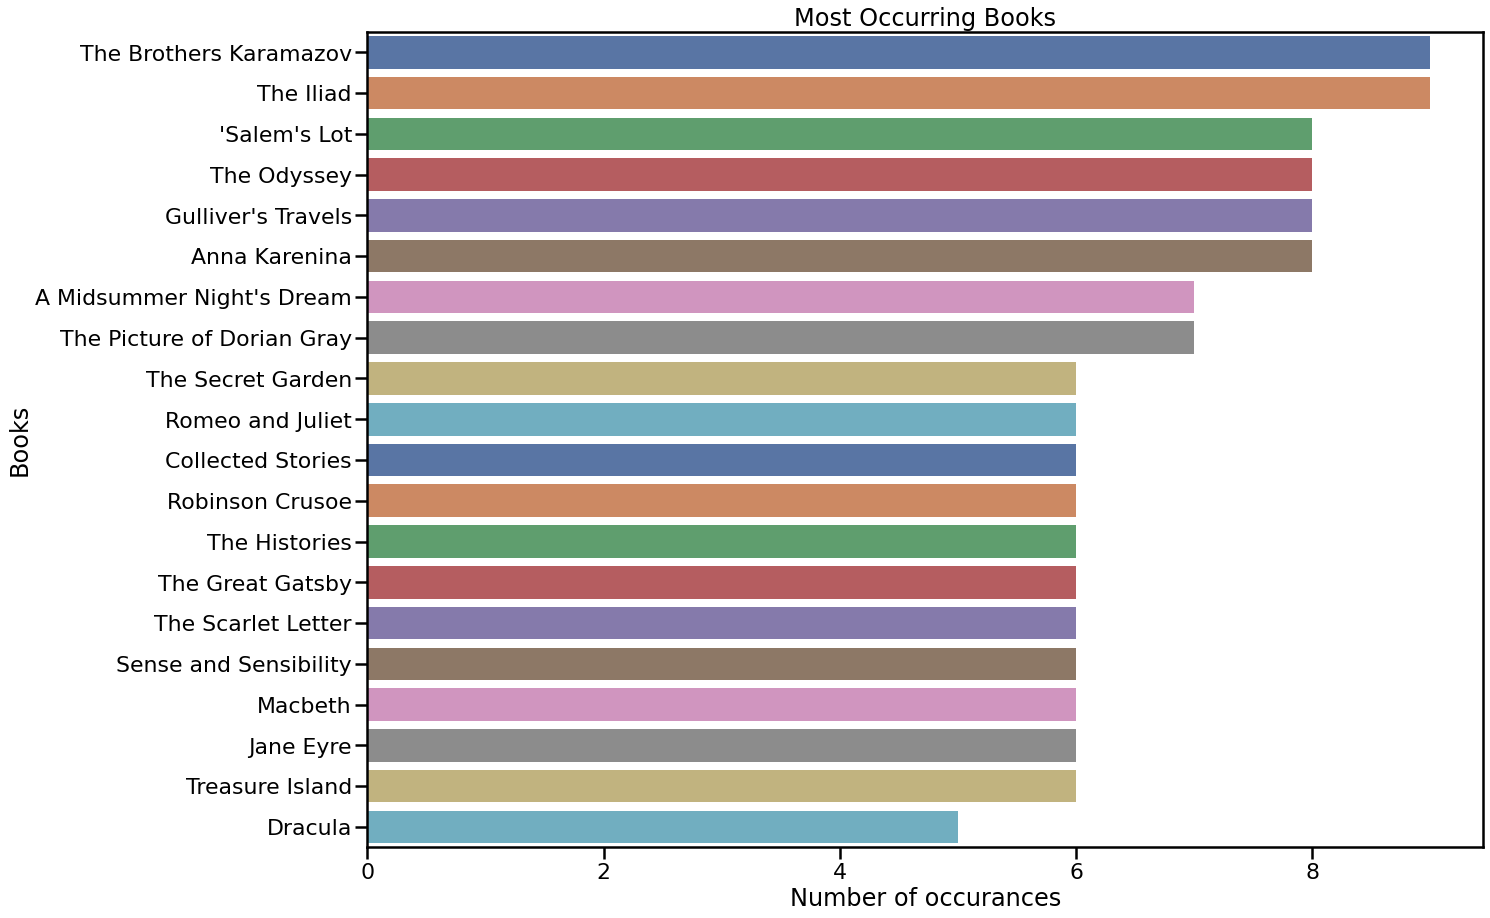

In [5]:
# Which are the books with most occurances in the list?

import seaborn as sns
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:20]
rating = df.average_rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

# These books have come up in this database over and over again, with various publication editions.